<h3>Importamos librerías a utilziar para nuestro EDA</h3>

In [576]:
import pandas as  pd
import seaborn as sns
from seaborn import countplot
import matplotlib.pyplot as plt

Cargamos el primer set de datos


In [577]:
df1 = pd.read_csv("udemy_courses.csv")

#dropeo columnas  que no considero importante para mi análisis

df1.drop(columns=['course_id','course_title','url','published_timestamp','num_reviews','num_lectures'], inplace=True)

df1

,is_paid,price,num_subscribers,level,content_duration,subject
0,True,200,2147,All Levels,1.5,Business Finance
1,True,75,2792,All Levels,39.0,Business Finance
2,True,45,2174,Intermediate Level,2.5,Business Finance
3,True,95,2451,All Levels,3.0,Business Finance
4,True,200,1276,Intermediate Level,2.0,Business Finance
...,...,...,...,...,...,...
3673,True,100,1040,All Levels,2.0,Web Development
3674,True,25,306,Beginner Level,3.5,Web Development
3675,True,40,513,All Levels,3.5,Web Development
3676,True,50,300,All Levels,3.0,Web Development


Empezamos a tomar información de las tablas, para eso realizamos transformaciones

In [578]:
# Mapeo para poder graficar las variables
levelsudemy = {'All Levels': 0, 'Intermediate Level': 1, 'Beginner Level': 2, 'Expert Level' : 3}
df1['level'] = df1['level'].map(levelsudemy)

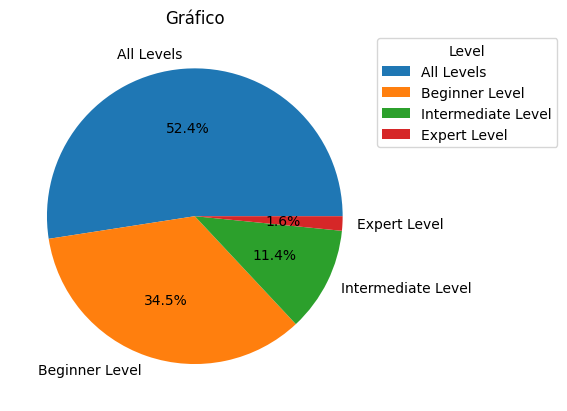

In [579]:
# Crear un dataframe de ejemplo con las categorías
level_mapping = {0: 'All Levels', 1: 'Intermediate Level', 2: 'Beginner Level', 3: 'Expert Level'}
df1['level'] = df1['level'].map(level_mapping)


# Obtener la frecuencia de cada categoría
countsudemy = df1['level'].value_counts()

# Obtener los valores de la columna 'counts' para los datos
valuesudemy = countsudemy.values
labelsudemy = countsudemy.index

# Crear el gráfico de torta
fig, ax = plt.subplots()
ax.pie(valuesudemy, labels=labelsudemy, autopct='%1.1f%%')
ax.set_title("Gráfico")

ax.legend(labelsudemy,
          title="Level",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Mostrar el gráfico
plt.show()


<AxesSubplot:xlabel='price', ylabel='Count'>

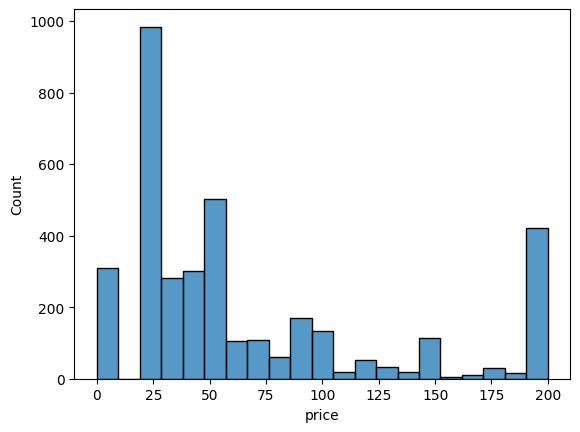

In [580]:
# Observo la columna de precio 

sns.histplot(df1.price)

In [581]:
# Mapeo para poder graficar
subjectsudemy = {'Business Finance': 0, 'Graphic Design': 1, 'Musical Instruments': 2, 'Web Development' : 3}
df1['subject'] = df1['subject'].map(subjectsudemy)

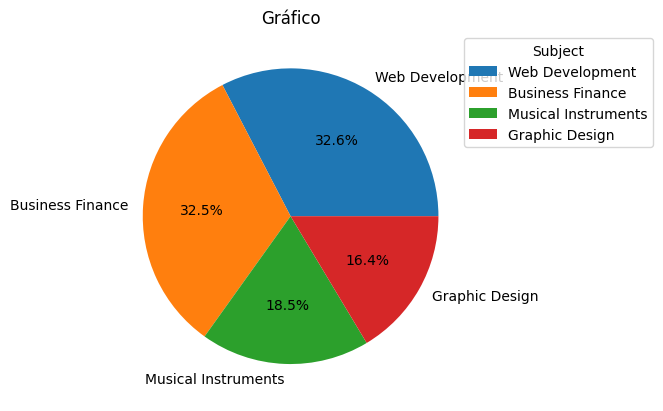

In [582]:
import matplotlib.pyplot as plt

# Crear un dataframe de ejemplo con las categorías
level_mapping = {0: 'Business Finance', 1: 'Graphic Design', 2: 'Musical Instruments', 3: 'Web Development'}
df1['subject'] = df1['subject'].map(level_mapping)


# Obtener la frecuencia de cada categoría
counts00 = df1['subject'].value_counts()

# Obtener los valores de la columna 'counts' para los datos
values01 = counts00.values
labels01 = counts00.index

# Crear el gráfico de torta
fig, ax2 = plt.subplots()
ax2.pie(values01, labels=labels01, autopct='%1.1f%%')
ax2.set_title("Gráfico")

ax2.legend(labels01,
          title="Subject",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Mostrar el gráfico
plt.show()


In [583]:
df = pd.read_csv("edx_courses.csv")

df.drop(columns=['course_description','institution','course_syllabus','course_url','title','summary','instructors','course_type','course_effort','course_length'], inplace=True)

df

,n_enrolled,Level,subject,language,subtitles,price
0,"124,980",Introductory,Education & Teacher Training,English,English,FREE-Add a Verified Certificate for $49 USD
1,"293,864",Introductory,Computer Science,English,English,FREE-Add a Verified Certificate for $49 USD
2,"2,442,271",Introductory,Computer Science,English,English,FREE-Add a Verified Certificate for $90 USD
3,"129,555",Intermediate,Data Analysis & Statistics,English,English,FREE-Add a Verified Certificate for $199 USD
4,"81,140",Introductory,Computer Science,English,English,FREE-Add a Verified Certificate for $249 USD
...,...,...,...,...,...,...
970,NaN,Intermediate,Social Sciences,English,English,FREE-Add a Verified Certificate for $25 USD
971,NaN,Introductory,Art & Culture,中文,"English, 中文",FREE-Add a Verified Certificate for $139 USD
972,"11,246",Advanced,Biology & Life Sciences,English,English,FREE-Add a Verified Certificate for $139 USD
973,"8,775",Introductory,Environmental Studies,English,English,FREE-Add a Verified Certificate for $25 USD


In [584]:
df['n_enrolled'] = df['n_enrolled'].str.replace(',','.').str.replace('\.', '').astype(float)

#transformamos los datos para poder pasarlos de str a float, de esta manera vamos a poder utilziarlos en gráficos

C:\Users\usuario\AppData\Local\Temp\ipykernel_11616\4096997594.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['n_enrolled'] = df['n_enrolled'].str.replace(',','.').str.replace('\.', '').astype(float)


In [585]:
# Obtenemos solamente el valor númerico de la columna price

import re

def extract_number(text):
    match = re.search(r'\$(\d+)', text)
    return float(match.group(1)) if match else None

df['price'] = df['price'].apply(extract_number)


In [586]:
df.price

0       49.0
1       49.0
2       90.0
3      199.0
4      249.0
       ...  
970     25.0
971    139.0
972    139.0
973     25.0
974     79.0
Name: price, Length: 975, dtype: float64

Visualizamos la distribución de precios de los cursos

<AxesSubplot:xlabel='price', ylabel='Count'>

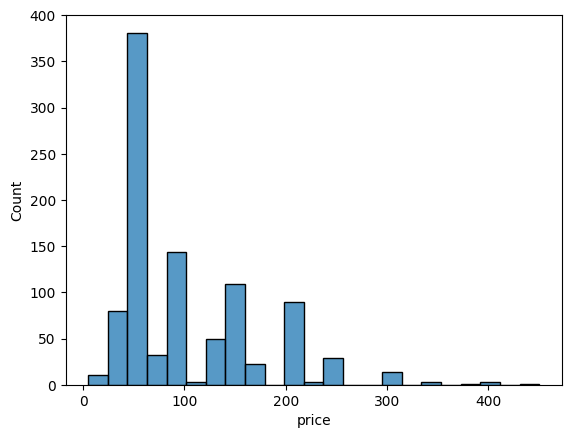

In [587]:
sns.histplot(df.price)

In [588]:
levels = {'Introductory': 0, 'Intermediate': 1, 'Advanced': 2}
df['Level'] = df['Level'].map(levels)


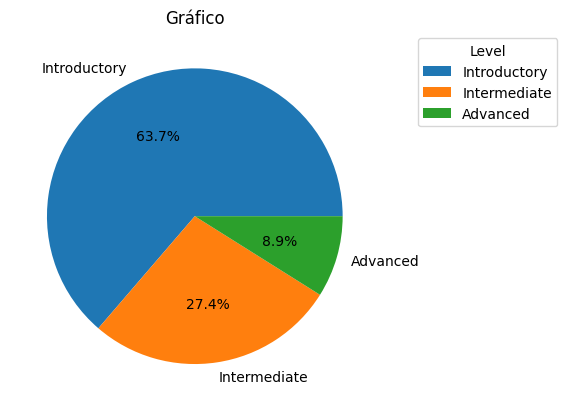

In [589]:
import matplotlib.pyplot as plt

# Crear un dataframe de ejemplo con las categorías
level_mapping = {0: 'Introductory', 1: 'Intermediate', 2: 'Advanced'}
df['Level'] = df['Level'].map(level_mapping)


# Obtener la frecuencia de cada categoría
counts = df['Level'].value_counts()

# Obtener los valores de la columna 'counts' para los datos
values = counts.values
labels = counts.index

# Crear el gráfico de torta
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.set_title("Gráfico")

ax.legend(labels,
          title="Level",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Mostrar el gráfico
plt.show()


In [590]:
df.subject.unique()

array(['Education & Teacher Training', 'Computer Science',
       'Data Analysis & Statistics', 'Business & Management',
       'Communication', 'Health & Safety', 'Math', 'Humanities', 'Ethics',
       'Economics & Finance', 'Food & Nutrition',
       'Biology & Life Sciences', 'Social Sciences', 'Architecture',
       'Medicine', 'Environmental Studies', 'Chemistry', 'Art & Culture',
       'Language', 'Engineering', 'Philosophy & Ethics', 'Electronics',
       'History', 'Literature', 'Physics', 'Law', 'Design', 'Science',
       'Music', 'Energy & Earth Sciences', 'Philanthropy'], dtype=object)

Como obtuvimos demaciadas asignaturas optamos por no codificarlas

In [2]:
import pandas as pd
df3 = pd.read_csv("Coursera_courses.csv")
df3

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


In [3]:
df4 = pd.read_csv("Coursera_reviews.csv")

df4


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [7]:
dfCoursera = pd.merge(df3,df4, on='course_id')

dfCoursera.drop(columns=['institution','course_url','course_id','reviews','reviewers','date_reviews'], inplace=True)

dfCoursera

,name,rating
0,Machine Learning,1
1,Machine Learning,1
2,Machine Learning,1
3,Machine Learning,1
4,Machine Learning,1
...,...,...
1454706,Managing as a Coach,5
1454707,Managing as a Coach,5
1454708,Managing as a Coach,5
1454709,Managing as a Coach,5


Agrupo por nombre y saco el promedio del rating, llevandome solo un valor despúes de la coma para fines más practicos

In [9]:
grouped = dfCoursera.groupby('name').mean().round(1)


grouped.to_csv("coursera.csv")

In [592]:
df.to_csv("exd.csv")

In [593]:
df1.to_csv("udemy.csv")